### Ran at following tags
MagD https://github.com/pnsn/magD/tree/v2.1

magd_client https://github.com/pnsn/magd_client/tree/v2.2

# Station Density Profile of Washington Earthquake Early Warning Stations

## Create csv of all EEW sites

Must have the following headers:
* net
* sta
* chan
* location
* lat
* lon
* rate*

*sample rate(not required)


## Clean CSV

Remove duplicate stations since we are only concerned with spatial location

In [74]:
%run scripts/clean_csv.py -i csv/eew_density/eew_stas_current_all.csv -o csv/eew_density/eew_stas_current_clean.csv

 ## Station density

--------------------------------------------------------------------------------------------------

In [1]:
from magD.magD import MagD
from magD.pickle import get_pickle
import os

##some constants for all plots
#path to local magd_client

magd_client_path = '/Users/joncon/Sites/magd_client/'
pickle_path = magd_client_path + "/pickle_jar"
os.chdir(magd_client_path)
print('Working in ' + os.getcwd())

lat_min=41.5
lat_max=49.5
lon_min=-127.5
lon_max=-116.5
#
resolution=1
#number of stations to use in solution. 
num_solutions=4

velocity_p = 5.4
velocity_s = 3

#eew processing time
processing_time = 4


data_srcs ={'washington_current':
                {
                    'csv_path':'csv/eew_washington/current.csv',
                    'color': 'yellow',
                    'symbol': '^',
                    'size': 50,
                    'label': "Current",
                    'unit': 'Km',
                    'klass': 'scnl'
                },
            'washington_notional':
                {
                    'csv_path':'csv/eew_washington/notional.csv',
                    'color': 'red',
                    'symbol': '^',
                    'size': 50,
                    'label': "Notional",
                    'unit': 'Km',
                    'klass': 'scnl'
                },
                
            }

def make_grid(grid_type, src, lat_min=lat_min, lat_max=lat_max, lon_min=lon_min, lon_max=lon_max):
    grid = MagD(grid_type, name, resolution, lat_min, lat_max, lon_min, lon_max, 
                   num_solutions, pickle_path)
    grid.build_markers(src)
    grid.build_origins()
    grid.build_matrix()
    grid.save()
    return grid




Working in /Users/joncon/Sites/magd_client


In [2]:
#only run once
import os
os.chdir(magd_client_path)
print('Working in ' + os.getcwd())
from magD.pickle import *
#set book to autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

Working in /Users/joncon/Sites/magd_client


### Create Grids

In [3]:
#name of config file in ./config/{name}.ini
name ="washington_current"

grid_type = 'dist_max'

src = {}
src['washington_current'] = data_srcs['washington_current']
%time grid_current = make_grid(grid_type, src)
print(grid_current.get_path())

Profiling spatially...
lat: CPU times: user 6.61 s, sys: 7.36 ms, total: 6.62 s
Wall time: 6.62 s
/Users/joncon/Sites/magd_client//pickle_jar/washington_current/dist_max_grid/8x11-res-1.pickle


In [4]:
name ="washington_notional"

grid_type = 'dist_max'

src = {}
src['washington_current'] = data_srcs['washington_current']
src['washington_notional'] = data_srcs['washington_notional']
%time grid_notional = make_grid(grid_type, src)
print(grid_notional.get_path())

Profiling spatially...
lat: CPU times: user 8.68 s, sys: 12 ms, total: 8.69 s
Wall time: 8.7 s
/Users/joncon/Sites/magd_client//pickle_jar/washington_notional/dist_max_grid/8x11-res-1.pickle


In [5]:
# diff of notional and current
grid_diff_0 = grid_notional.copy("diff_0", "diff_0")
grid_diff_0.matrix = grid_current.matrix - grid_notional.matrix
grid_diff_0.save()
grid_diff_0_path= grid_diff_0.get_path()
print(grid_diff_0_path)

/Users/joncon/Sites/magd_client//pickle_jar/diff_0/diff_0_grid/8x11-res-1.pickle


In [6]:
# Once pickle is created, no need to run grid again
grid_current = get_pickle(
    "/Users/joncon/Sites/magd_client//pickle_jar/washington_current/dist_max_grid/85x150-res-0.1.pickle")
grid_notional = get_pickle(
    "/Users/joncon/Sites/magd_client//pickle_jar/washington_notional/dist_max_grid/85x150-res-0.1.pickle")
grid_diff_0 = get_pickle( 
    "/Users/joncon/Sites/magd_client//pickle_jar/diff_0/diff_0_grid/85x150-res-0.1.pickle")

### Current Density

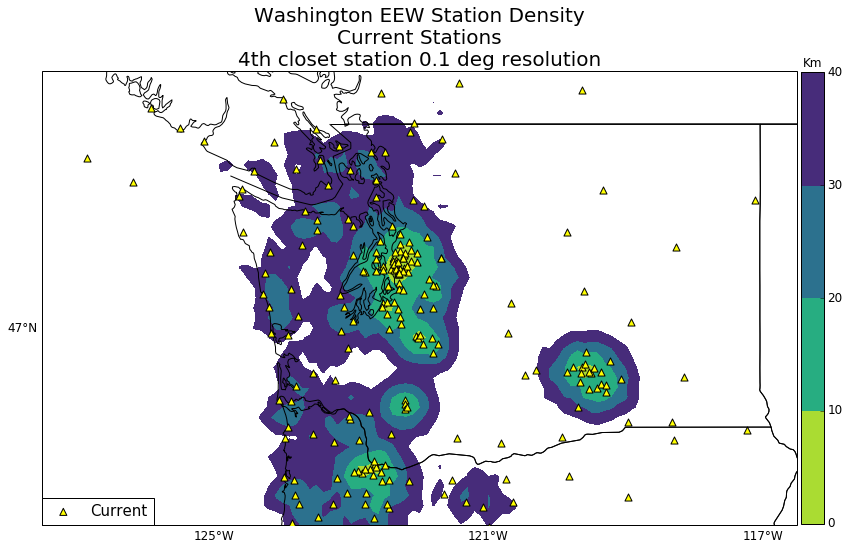

In [8]:
path = grid_current.get_path()

%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="Washington EEW Station Density" \
--title2="Current Stations" \
--title3="4th closet station 0.1 deg resolution" \
--color=viridis_r \
--lat_min=45 \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--plotwidth=14 \
--plotheight=14 \
--stas \
--legend_pad=0 \
--colorbar_pad=0.005 \
--colorbar_fraction=0.0289 \
--levels=0,10,20,30,40

### Current and Notitional Density

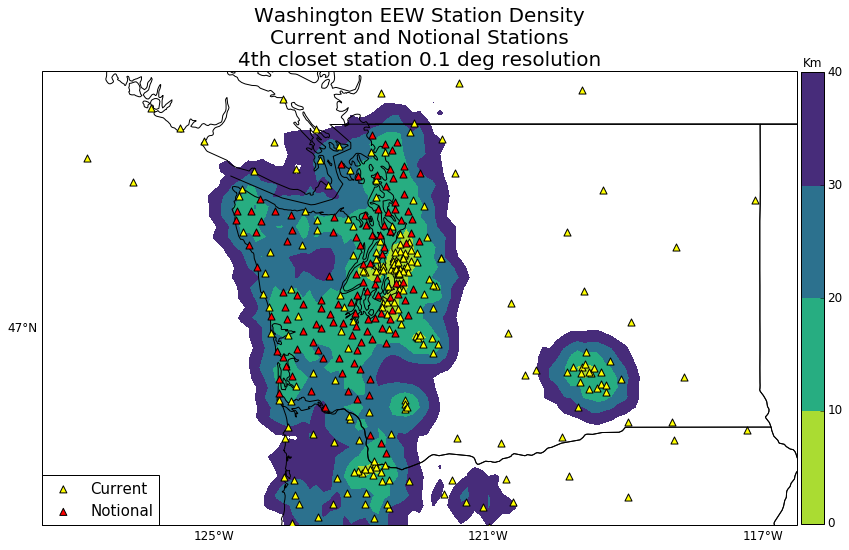

In [9]:
path = grid_notional.get_path()
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="Washington EEW Station Density" \
--title2="Current and Notional Stations" \
--title3="4th closet station 0.1 deg resolution" \
--color=viridis_r \
--lat_min=45 \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--plotwidth=14 \
--plotheight=14 \
--stas \
--legend_pad=0 \
--colorbar_pad=0.005 \
--colorbar_fraction=0.0289 \
--levels=0,10,20,30,40

### Diff of Current and Notional Density

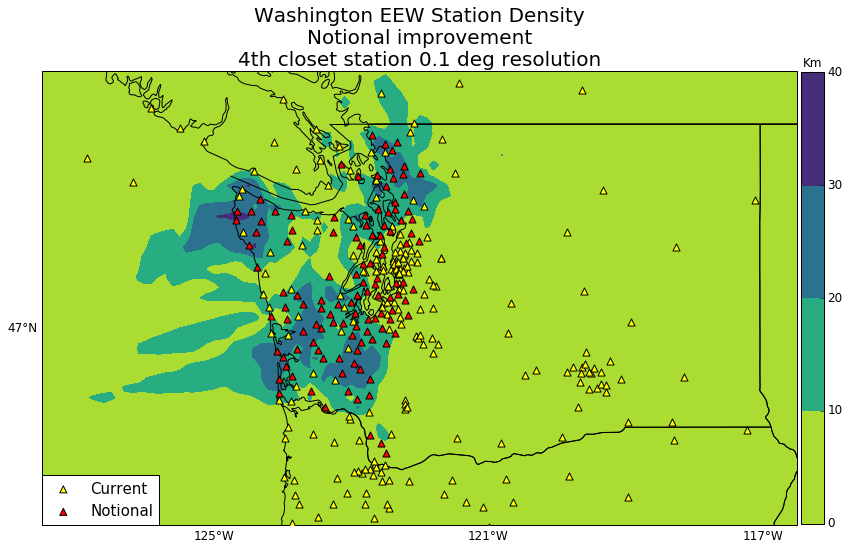

In [10]:
path = grid_diff_0.get_path()
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="Washington EEW Station Density" \
--title2="Notional improvement" \
--title3="4th closet station 0.1 deg resolution" \
--legend_pad=0 \
--colorbar_pad=0.005 \
--colorbar_fraction=0.0289 \
--lat_min=45 \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--plotwidth=14 \
--plotheight=14 \
--color=viridis_r \
--stas \
--levels=0,10,20,30,40

## Blind zone
For all origins in grid, calculate blind zone for epicenter at this origin. Blind zone = 

--------------------------------------------------------------------------------------------------------------

In [11]:


#8km current
grid_blindzone8 = grid_current.copy("blindzone", "grid_blindzone8")
grid_blindzone8.transform_to_blindzone(velocity_p, velocity_s, 8)
grid_blindzone8.save()
grid_blindzone8_path = grid_blindzone8.get_path()

#8km notional
grid_notional_blindzone8 = grid_notional.copy("blindzone", "grid_notional_blindzone8")
grid_notional_blindzone8.transform_to_blindzone(velocity_p, velocity_s, 8)
grid_notional_blindzone8.save()
grid_notional_blindzone8_path = grid_notional_blindzone8.get_path()

#8km diff
grid_diff_blindzone8 = grid_notional_blindzone8.copy("blindzone", "diff_blindzone8")
grid_diff_blindzone8.matrix = grid_blindzone8.matrix - grid_notional_blindzone8.matrix
grid_diff_blindzone8.save()
grid_diff_blindzone8_path = grid_diff_blindzone8.get_path()

#20km current
grid_blindzone20 = grid_current.copy("blindzone", "grid_blindzone20")
grid_blindzone20.transform_to_blindzone(velocity_p, velocity_s, 20)
grid_blindzone20.save()
grid_blindzone20_path = grid_blindzone20.get_path()

#20km current + notional
grid_notional_blindzone20 = grid_notional.copy("blindzone", "grid_notional_blindzone20")
grid_notional_blindzone20.transform_to_blindzone(velocity_p, velocity_s, 20)
grid_notional_blindzone20.save()
grid_notional_blindzone20_path = grid_notional_blindzone20.get_path()

#20km diff
grid_diff_blindzone20 = grid_notional_blindzone20.copy("blindzone", "diff_blindzone20")
grid_diff_blindzone20.matrix = grid_blindzone20.matrix - grid_notional_blindzone20.matrix
grid_diff_blindzone20.save()
grid_diff_blindzone20_path = grid_notional_blindzone20.get_path()

#50km current
grid_blindzone50 = grid_current.copy("blindzone", "grid_blindzone50")
grid_blindzone50.transform_to_blindzone(velocity_p, velocity_s, 50)
grid_blindzone50.save()
grid_blindzone50_path = grid_blindzone50.get_path()

#50km current + notional
grid_notional_blindzone50 = grid_notional.copy("blindzone", "grid_notional_blindzone50")
grid_notional_blindzone50.transform_to_blindzone(velocity_p, velocity_s, 50)
grid_notional_blindzone50.save()
grid_notional_blindzone50_path = grid_notional_blindzone50.get_path()

#50km diff
grid_diff_blindzone50 = grid_notional_blindzone50.copy("blindzone", "diff_blindzone50")
grid_diff_blindzone50.matrix = grid_blindzone50.matrix - grid_notional_blindzone50.matrix
grid_diff_blindzone50.save()
grid_diff_blindzone50_path = grid_notional_blindzone50.get_path()

### Current Stations, Depth: 8km

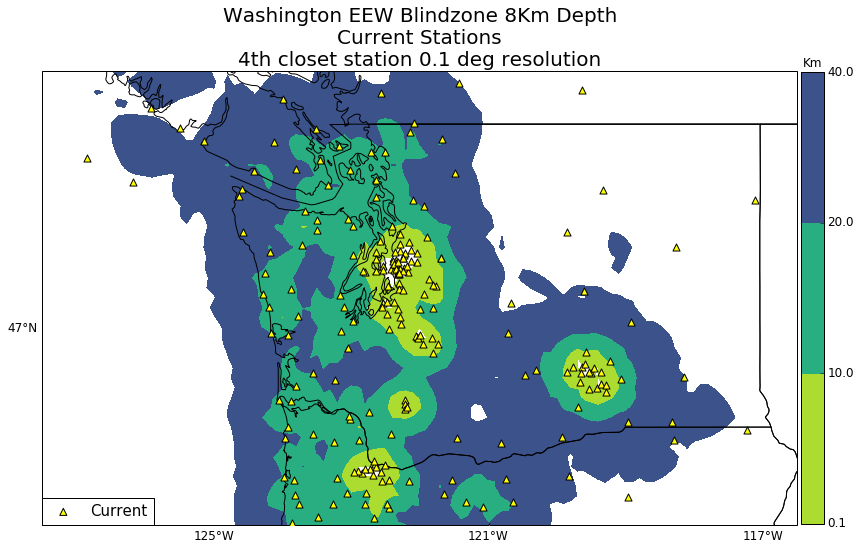

In [13]:
path = grid_blindzone8.get_path()
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="Washington EEW Blindzone 8Km Depth" \
--title2="Current Stations" \
--title3="4th closet station 0.1 deg resolution" \
--lat_min=45 \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--plotwidth=14 \
--plotheight=14 \
--stas \
--color=viridis_r \
--legend_pad=0 \
--colorbar_pad=0.005 \
--colorbar_fraction=0.0289 \
--levels=0.1,10,20,40

### Current and Notional Stations, Depth: 8km

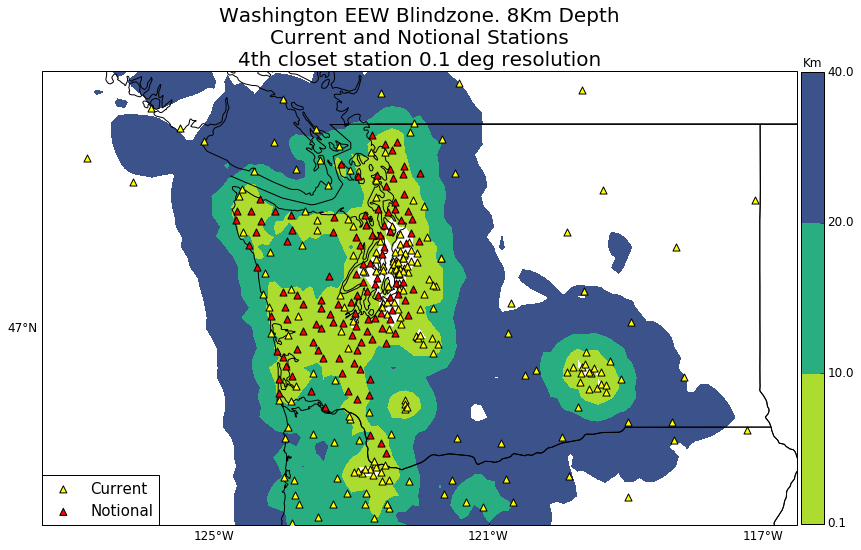

In [15]:
path = grid_notional_blindzone8.get_path()
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="Washington EEW Blindzone. 8Km Depth" \
--title2="Current and Notional Stations" \
--title3="4th closet station 0.1 deg resolution" \
--stas \
--lat_min=45 \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--plotwidth=14 \
--plotheight=14 \
--color=viridis_r \
--legend_pad=0 \
--colorbar_pad=0.005 \
--colorbar_fraction=0.0289 \
--levels=0.1,10,20,40

### Diff of Current and Notional Depth: 8Km

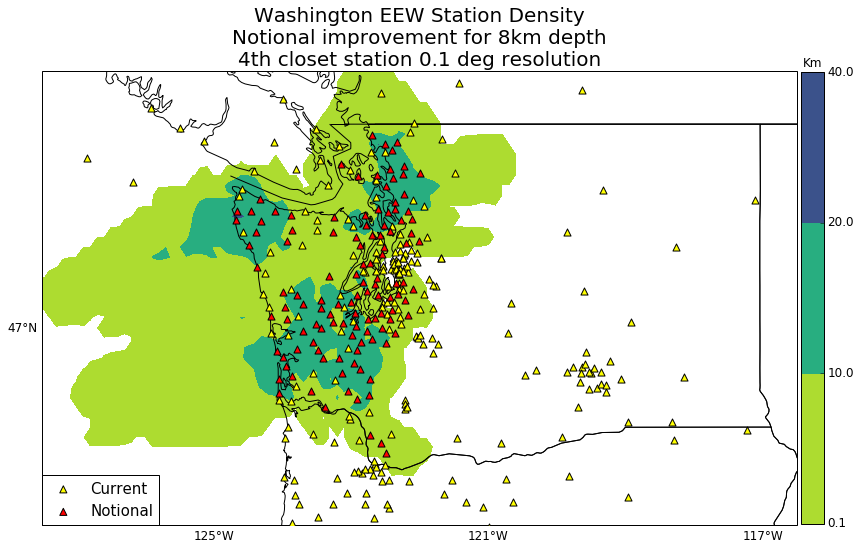

In [16]:
path = grid_diff_blindzone8.get_path()
%run -i scripts/plot_heatmap.py \
--path=$grid_diff_blindzone8_path \
--title1="Washington EEW Station Density" \
--title2="Notional improvement for 8km depth" \
--title3="4th closet station 0.1 deg resolution" \
--color=viridis_r \
--lat_min=45 \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--plotwidth=14 \
--plotheight=14 \
--stas \
--legend_pad=0 \
--colorbar_pad=0.005 \
--colorbar_fraction=0.0289 \
--levels=0.1,10,20,40

------------------------------------------------------------------------------------------------------------------

### Current Stations, Depth: 20km

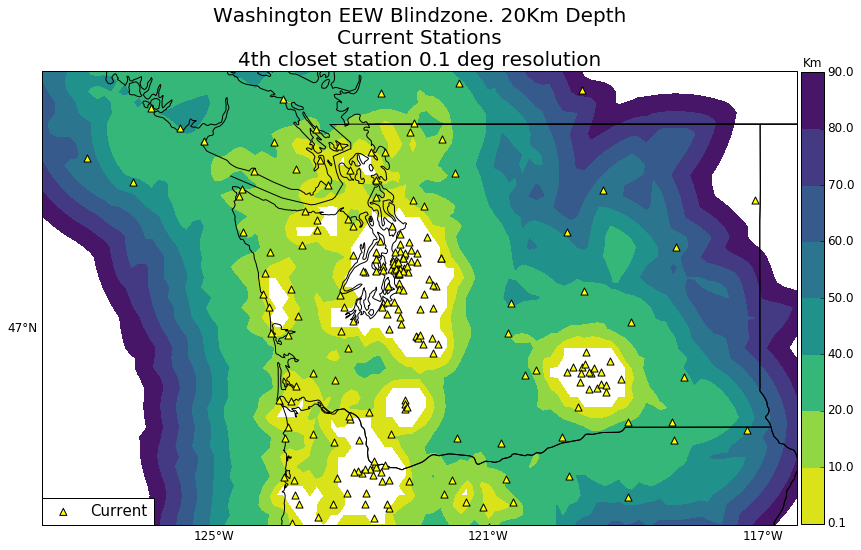

In [37]:
path = grid_blindzone20.get_path()
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="Washington EEW Blindzone. 20Km Depth" \
--title2="Current Stations" \
--title3="4th closet station 0.1 deg resolution" \
--stas \
--lat_min=45 \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--plotwidth=14 \
--plotheight=14 \
--color=viridis_r \
--legend_pad=0 \
--colorbar_pad=0.005 \
--colorbar_fraction=0.0289 \
--levels=0.1,10,20,40,50,60,70,80,90

### Current and Notional Stations, Depth: 20km

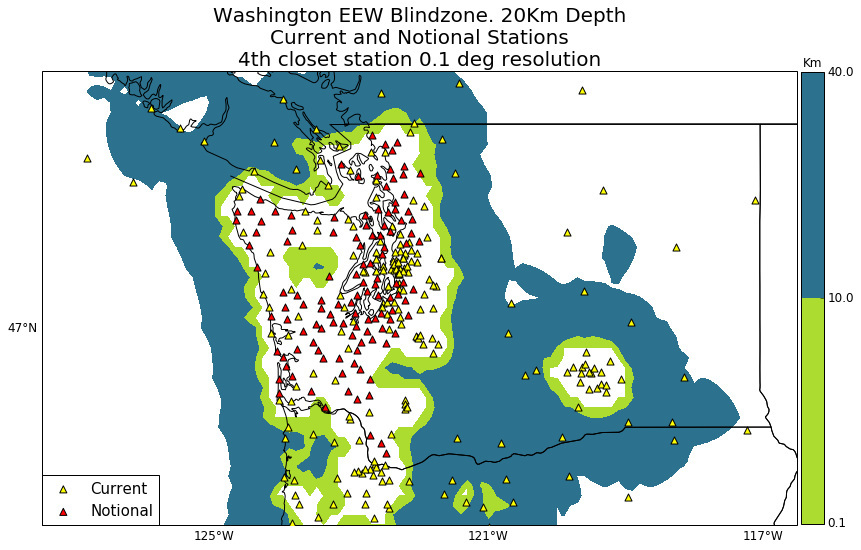

In [20]:
path = grid_notional_blindzone20.get_path()
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="Washington EEW Blindzone. 20Km Depth" \
--title2="Current and Notional Stations" \
--title3="4th closet station 0.1 deg resolution" \
--stas \
--lat_min=45 \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--plotwidth=14 \
--plotheight=14 \
--color=viridis_r \
--legend_pad=0 \
--colorbar_pad=0.005 \
--colorbar_fraction=0.0289 \
--levels=0.1,10,40

### Diff of Current and Notional Depth: 20Km

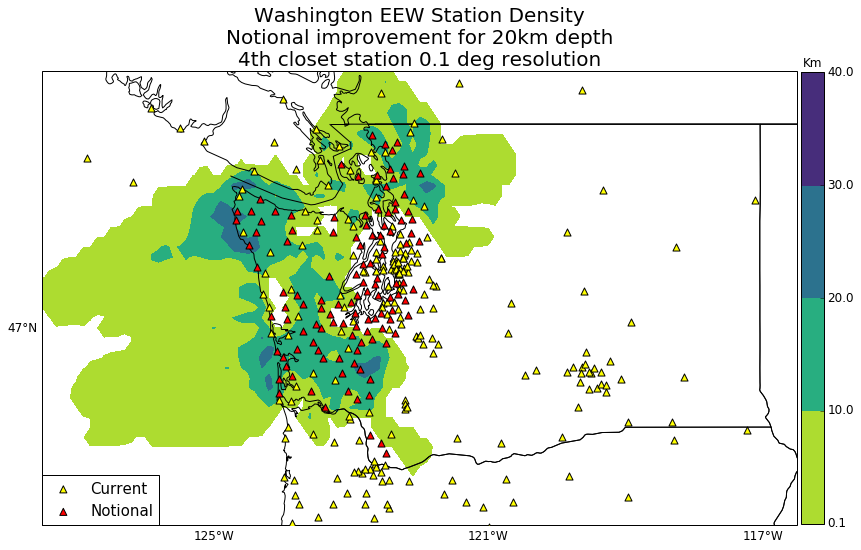

In [22]:
path = grid_diff_blindzone20.get_path()
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="Washington EEW Station Density" \
--title2="Notional improvement for 20km depth" \
--title3="4th closet station 0.1 deg resolution" \
--color=viridis_r \
--lat_min=45 \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--plotwidth=14 \
--plotheight=14 \
--stas \
--legend_pad=0 \
--colorbar_pad=0.005 \
--colorbar_fraction=0.0289 \
--levels=0.1,10,20,30,40

### Current Stations, Depth: 50km

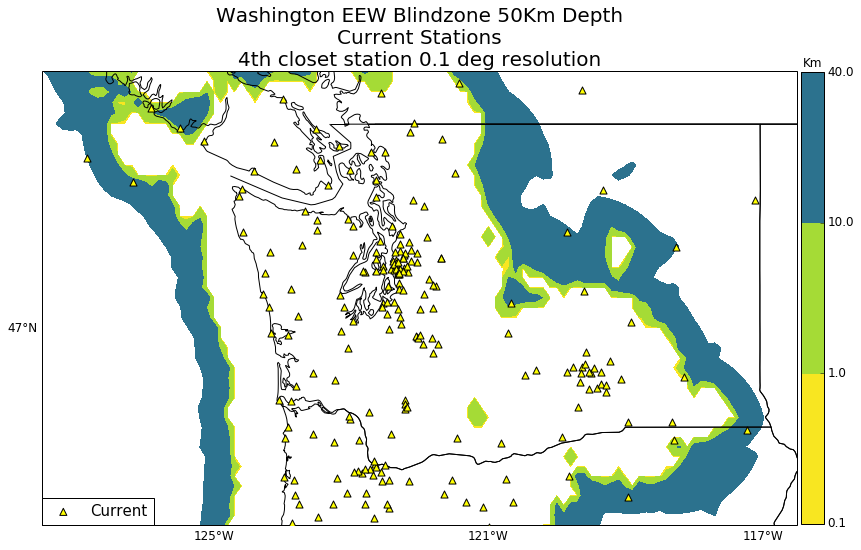

In [23]:
path = grid_blindzone50.get_path()
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="Washington EEW Blindzone 50Km Depth" \
--title2="Current Stations" \
--title3="4th closet station 0.1 deg resolution" \
--stas \
--lat_min=45 \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--plotwidth=14 \
--plotheight=14 \
--color=viridis_r \
--legend_pad=0 \
--colorbar_pad=0.005 \
--colorbar_fraction=0.0289 \
--levels=0.1,1,10,40

### Current and Notional Stations, Depth: 20km

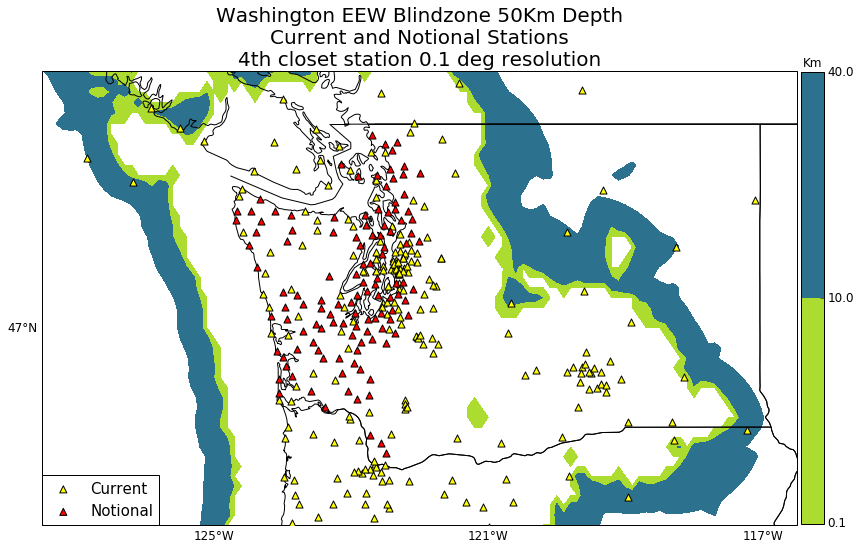

In [24]:
path = grid_notional_blindzone50.get_path()
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="Washington EEW Blindzone 50Km Depth" \
--title2="Current and Notional Stations" \
--title3="4th closet station 0.1 deg resolution" \
--stas \
--lat_min=45 \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--plotwidth=14 \
--plotheight=14 \
--color=viridis_r \
--legend_pad=0 \
--colorbar_pad=0.005 \
--colorbar_fraction=0.0289 \
--levels=0.1,10,40

### Diff of Current and Notional Depth: 50Km

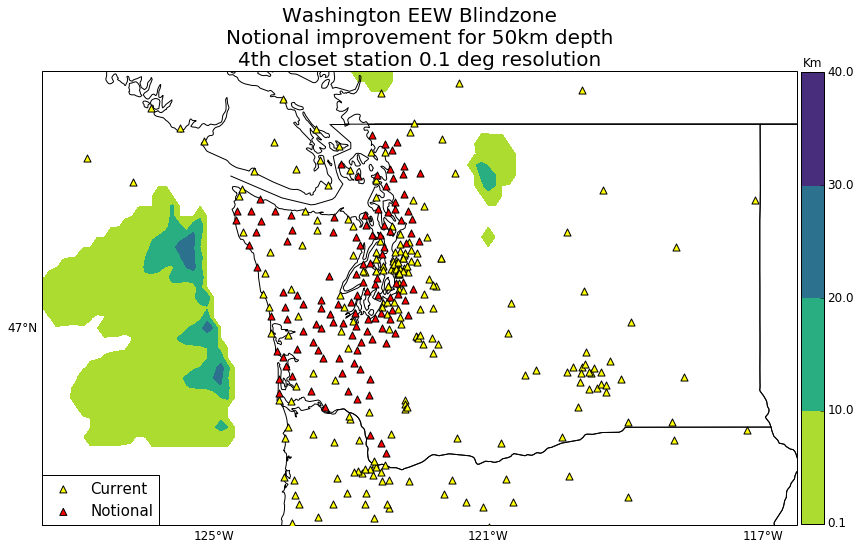

In [25]:
path = grid_diff_blindzone50.get_path()
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="Washington EEW Blindzone" \
--title2="Notional improvement for 50km depth" \
--title3="4th closet station 0.1 deg resolution" \
--color=viridis_r \
--lat_min=45 \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--plotwidth=14 \
--plotheight=14 \
--stas \
--legend_pad=0 \
--colorbar_pad=0.005 \
--colorbar_fraction=0.0289 \
--levels=0.1,10,20,30,40

## Trigger Time

@ each origin as epicenter, how much long until eew alert is generated?

For all origins, calculate p distance * p_velocity + processing_time(sec)

--------------------------------------------------------------------------------------------------------------

In [26]:
#8km current
grid_trigger8 = grid_current.copy("trigger", "grid_trigger8")
grid_trigger8.transform_to_trigger_time(velocity_p, processing_time, 8)
grid_trigger8.save()
grid_trigger8_path = grid_trigger8.get_path()

#8km current + notional
grid_notional_trigger8 = grid_notional.copy("trigger", "grid_notional_trigger8")
grid_notional_trigger8.transform_to_trigger_time(velocity_p, processing_time, 8)
grid_notional_trigger8.save()
grid_notional_trigger8_path = grid_notional_trigger8.get_path()

#8km diff
grid_diff_trigger8 = grid_notional_trigger8.copy("trigger", "diff_trigger8")
grid_diff_trigger8.matrix = grid_trigger8.matrix - grid_notional_trigger8.matrix
grid_diff_trigger8.save()
grid_diff_trigger8_path = grid_diff_trigger8.get_path()

#20km current
grid_trigger20 = grid_current.copy("trigger", "grid_trigger20")
grid_trigger20.transform_to_trigger_time(velocity_p, processing_time, 20)
grid_trigger20.save()
grid_trigger20_path = grid_trigger20.get_path()

#20km current + notional
grid_notional_trigger20 = grid_notional.copy("trigger", "grid_notional_trigger20")
grid_notional_trigger20.transform_to_trigger_time(velocity_p, processing_time, 20)
grid_notional_trigger20.save()
grid_notional_trigger20_path = grid_notional_trigger20.get_path()

#20km diff
grid_diff_trigger20 = grid_notional_trigger20.copy("trigger", "diff_trigger20")
grid_diff_trigger20.matrix = grid_trigger20.matrix - grid_notional_trigger20.matrix
grid_diff_trigger20.save()
grid_diff_trigger20_path = grid_diff_trigger20.get_path()

#50km current
grid_trigger50 = grid_current.copy("trigger", "grid_trigger50")
grid_trigger50.transform_to_trigger_time(velocity_p, processing_time, 50)
grid_trigger50.save()
grid_trigger50_path = grid_trigger50.get_path()

#50km current + notional
grid_notional_trigger50 = grid_notional.copy("trigger", "grid_notional_trigger50")
grid_notional_trigger50.transform_to_trigger_time(velocity_p, processing_time, 50)
grid_notional_trigger50.save()
grid_notional_trigger50_path = grid_notional_trigger50.get_path()

#50km diff
grid_diff_trigger50 = grid_notional_trigger50.copy("trigger", "diff_trigger50")
grid_diff_trigger50.matrix = grid_trigger50.matrix - grid_notional_trigger50.matrix
grid_diff_trigger50.save()
grid_diff_trigger50_path = grid_diff_trigger50.get_path()


### Current Stations, Depth: 8km

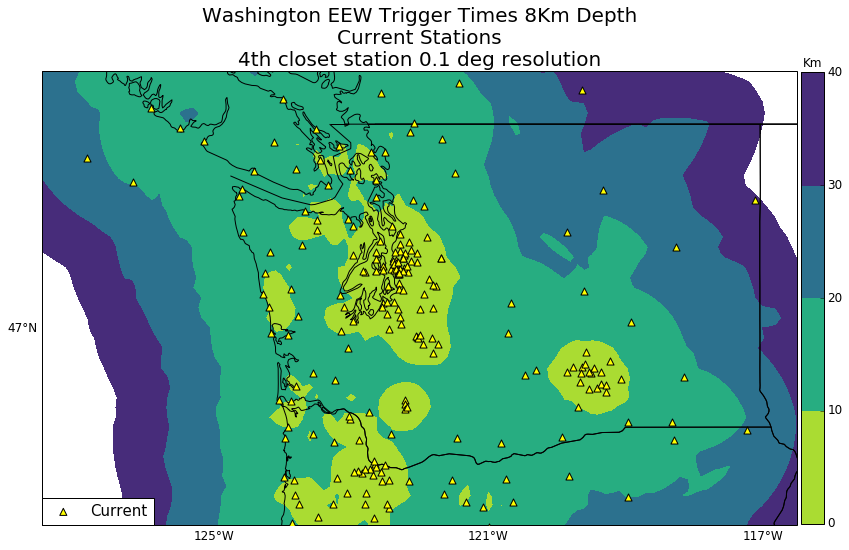

In [27]:
path = grid_trigger8.get_path()
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="Washington EEW Trigger Times 8Km Depth" \
--title2="Current Stations" \
--title3="4th closet station 0.1 deg resolution" \
--stas \
--lat_min=45 \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--plotwidth=14 \
--plotheight=14 \
--color=viridis_r \
--legend_pad=0 \
--colorbar_pad=0.005 \
--colorbar_fraction=0.0289 \
--levels=0,10,20,30,40

### Current and Notional Stations, Depth: 8km

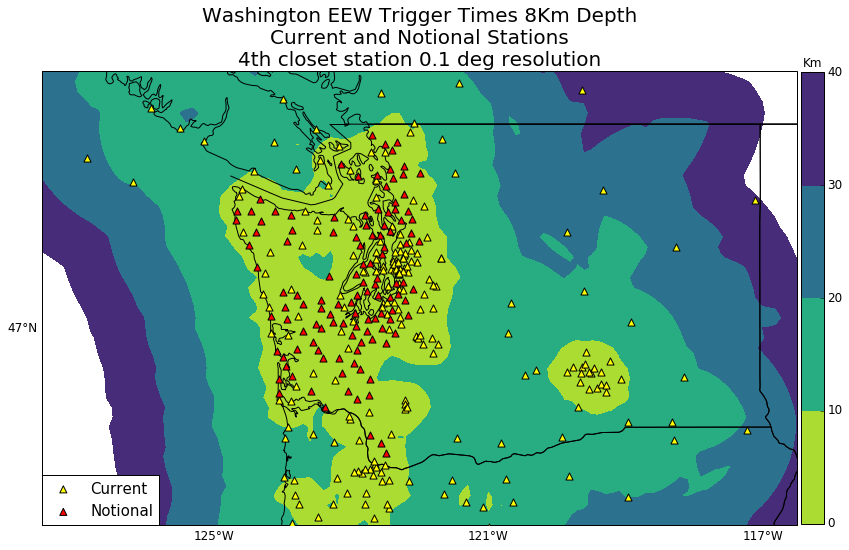

In [28]:
path = grid_notional_trigger8.get_path()
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="Washington EEW Trigger Times 8Km Depth" \
--title2="Current and Notional Stations" \
--title3="4th closet station 0.1 deg resolution" \
--stas \
--lat_min=45 \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--plotwidth=14 \
--plotheight=14 \
--color=viridis_r \
--legend_pad=0 \
--colorbar_pad=0.005 \
--colorbar_fraction=0.0289 \
--levels=0,10,20,30,40

### Diff of Current and Notional Depth: 8Km

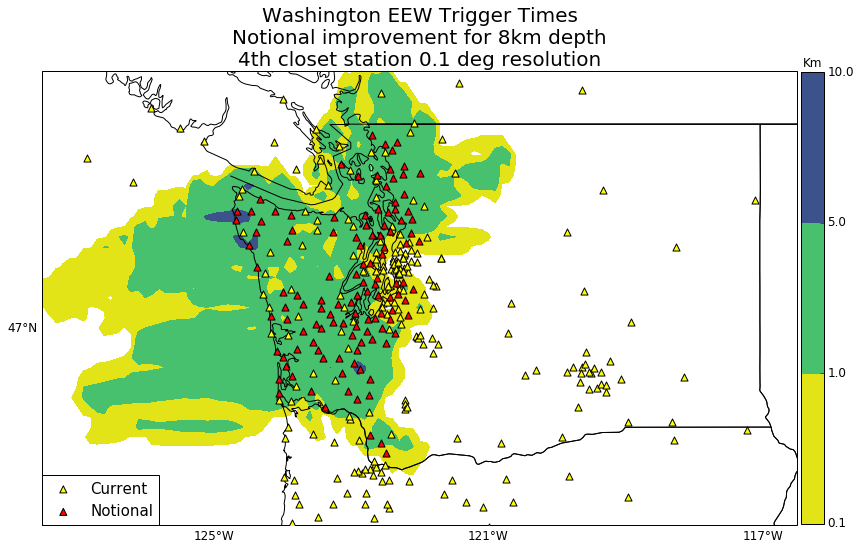

In [29]:
path = grid_diff_trigger8.get_path()
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="Washington EEW Trigger Times" \
--title2="Notional improvement for 8km depth" \
--title3="4th closet station 0.1 deg resolution" \
--color=viridis_r \
--lat_min=45 \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--plotwidth=14 \
--plotheight=14 \
--stas \
--legend_pad=0 \
--colorbar_pad=0.005 \
--colorbar_fraction=0.0289 \
--levels=0.1,1,5,10

------------------------------------------------------------------------------------------------------------------

### Current Stations, Depth: 20km

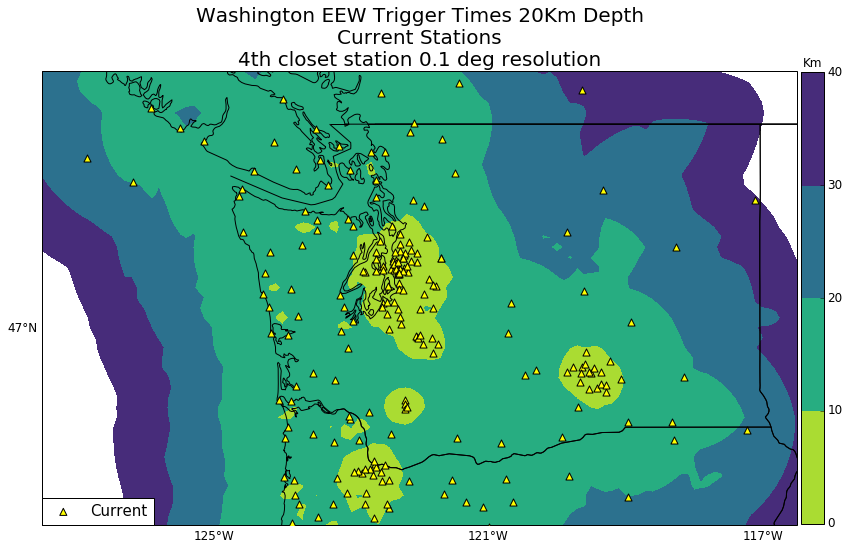

In [31]:
path = grid_trigger20.get_path()
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="Washington EEW Trigger Times 20Km Depth" \
--title2="Current Stations" \
--title3="4th closet station 0.1 deg resolution" \
--stas \
--lat_min=45 \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--plotwidth=14 \
--plotheight=14 \
--color=viridis_r \
--legend_pad=0 \
--colorbar_pad=0.005 \
--colorbar_fraction=0.0289 \
--levels=0,10,20,30,40

### Current and Notional Stations, Depth: 20km

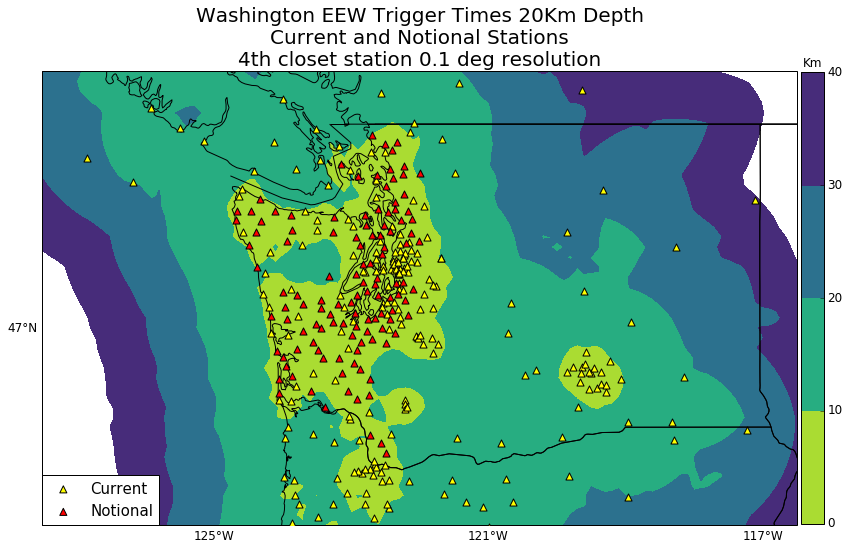

In [32]:
path = grid_notional_trigger20.get_path()
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="Washington EEW Trigger Times 20Km Depth" \
--title2="Current and Notional Stations" \
--title3="4th closet station 0.1 deg resolution" \
--stas \
--lat_min=45 \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--plotwidth=14 \
--plotheight=14 \
--color=viridis_r \
--legend_pad=0 \
--colorbar_pad=0.005 \
--colorbar_fraction=0.0289 \
--levels=0,10,20,30,40

### Diff of Current and Notional Depth: 20Km

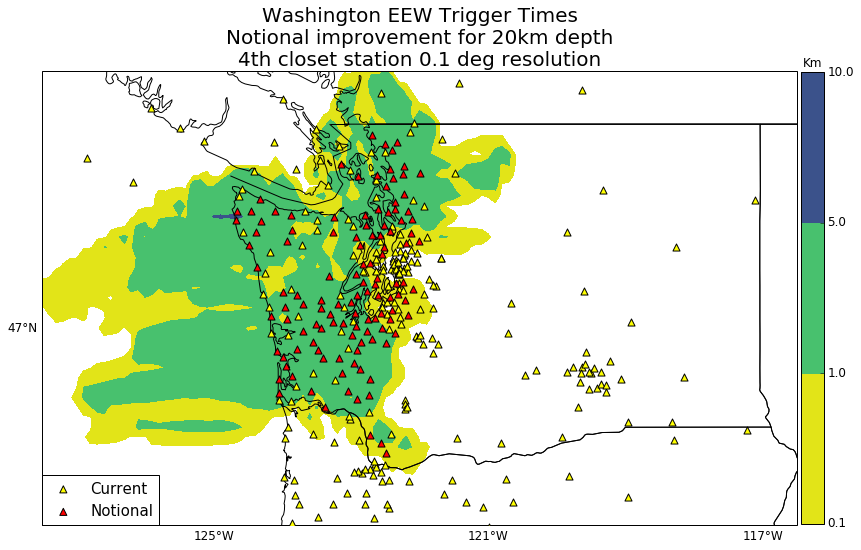

In [33]:
path = grid_diff_trigger20.get_path()
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="Washington EEW Trigger Times" \
--title2="Notional improvement for 20km depth" \
--title3="4th closet station 0.1 deg resolution" \
--color=viridis_r \
--lat_min=45 \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--plotwidth=14 \
--plotheight=14 \
--stas \
--legend_pad=0 \
--colorbar_pad=0.005 \
--colorbar_fraction=0.0289 \
--levels=0.1,1,5,10

### Current Stations, Depth: 50km

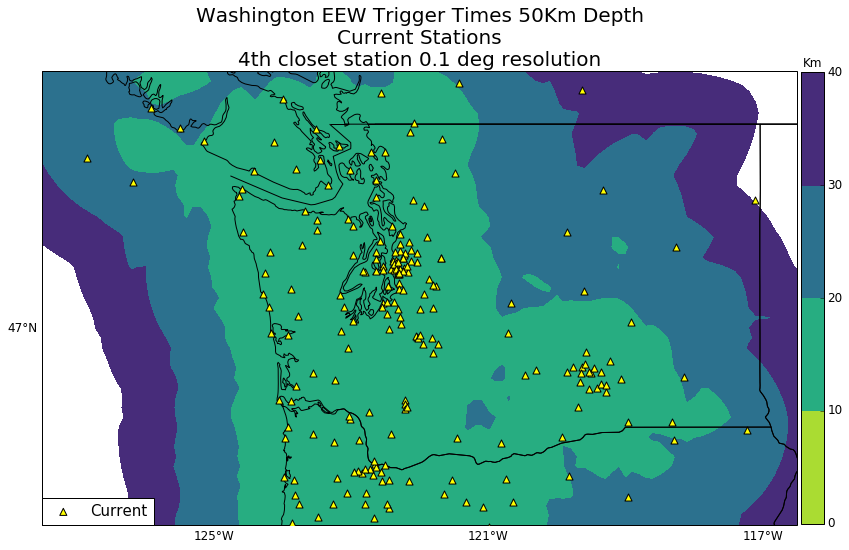

In [34]:
path = grid_trigger50.get_path()
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="Washington EEW Trigger Times 50Km Depth" \
--title2="Current Stations" \
--title3="4th closet station 0.1 deg resolution" \
--stas \
--lat_min=45 \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--plotwidth=14 \
--plotheight=14 \
--color=viridis_r \
--legend_pad=0 \
--colorbar_pad=0.005 \
--colorbar_fraction=0.0289 \
--levels=0,10,20,30,40

### Current and Notional Stations, Depth: 50km

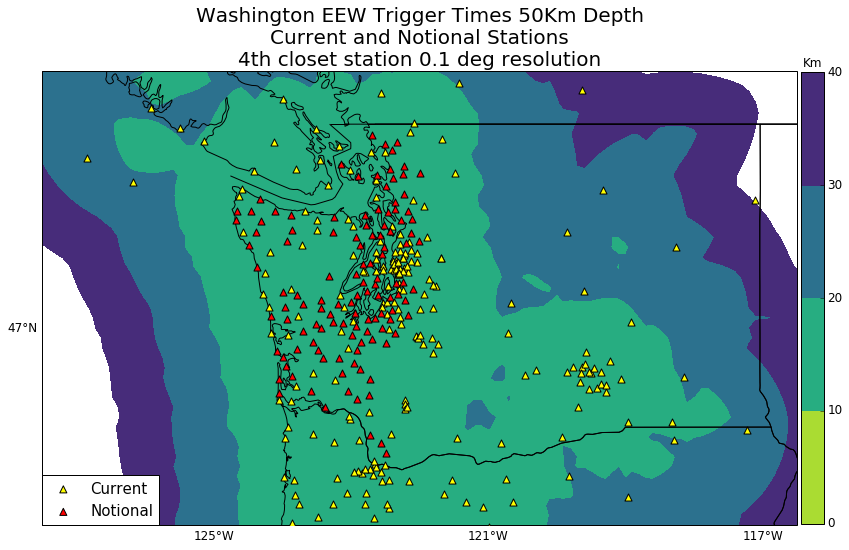

In [35]:
path = grid_notional_trigger50.get_path()
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="Washington EEW Trigger Times 50Km Depth" \
--title2="Current and Notional Stations" \
--title3="4th closet station 0.1 deg resolution" \
--stas \
--lat_min=45 \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--plotwidth=14 \
--plotheight=14 \
--color=viridis_r \
--legend_pad=0 \
--colorbar_pad=0.005 \
--colorbar_fraction=0.0289 \
--levels=0,10,20,30,40

### Diff of Current and Notional Depth: 50Km

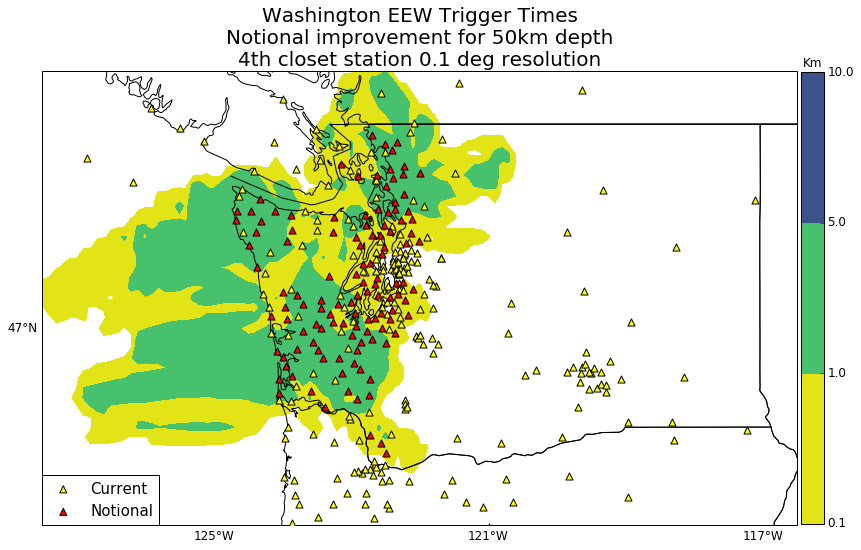

In [36]:
path = grid_diff_trigger50.get_path()
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="Washington EEW Trigger Times" \
--title2="Notional improvement for 50km depth" \
--title3="4th closet station 0.1 deg resolution" \
--color=viridis_r \
--lat_min=45 \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--plotwidth=14 \
--plotheight=14 \
--stas \
--legend_pad=0 \
--colorbar_pad=0.005 \
--colorbar_fraction=0.0289 \
--levels=0.1,1,5,10